### Importing all the required libraries

In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Setting sns plot configuration to the uniform required sizes

In [2]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("paper", rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":20}) 
sns.set_style("whitegrid")
sns.set(font_scale=2)

### Ignoring all the warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file into variable df and viewing the top 5 Rows

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking if we have any Null Values in the data set

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Checking how the data is distributed with 5 Number summary and some stats

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking the DataTypes of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking the shape(Number of Rows and Columns) of the dataset

In [8]:
df.shape

(32561, 15)

### Mapping Salary column to zero and one with less than 50k and greater than 50k respectively

In [9]:
salary_map={' <=50K':0,' >50K':1} 
df['salary']=df['salary'].map(salary_map).astype(int)

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### stripping all the spaces from the strings in the data

In [11]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
#applying whitespace_remover function on dataframe
whitespace_remover(df)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Checking the correlation of the features

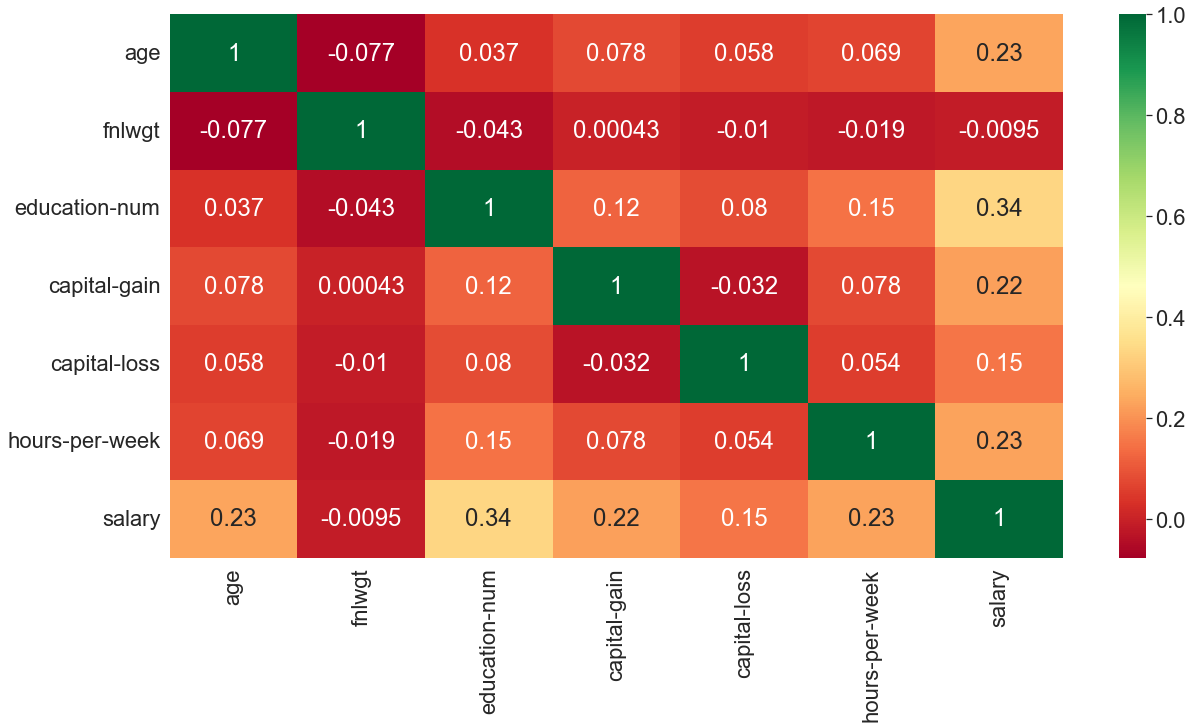

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap = 'RdYlGn')

## The below chart shows the division of the salary based on gender where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on gender')

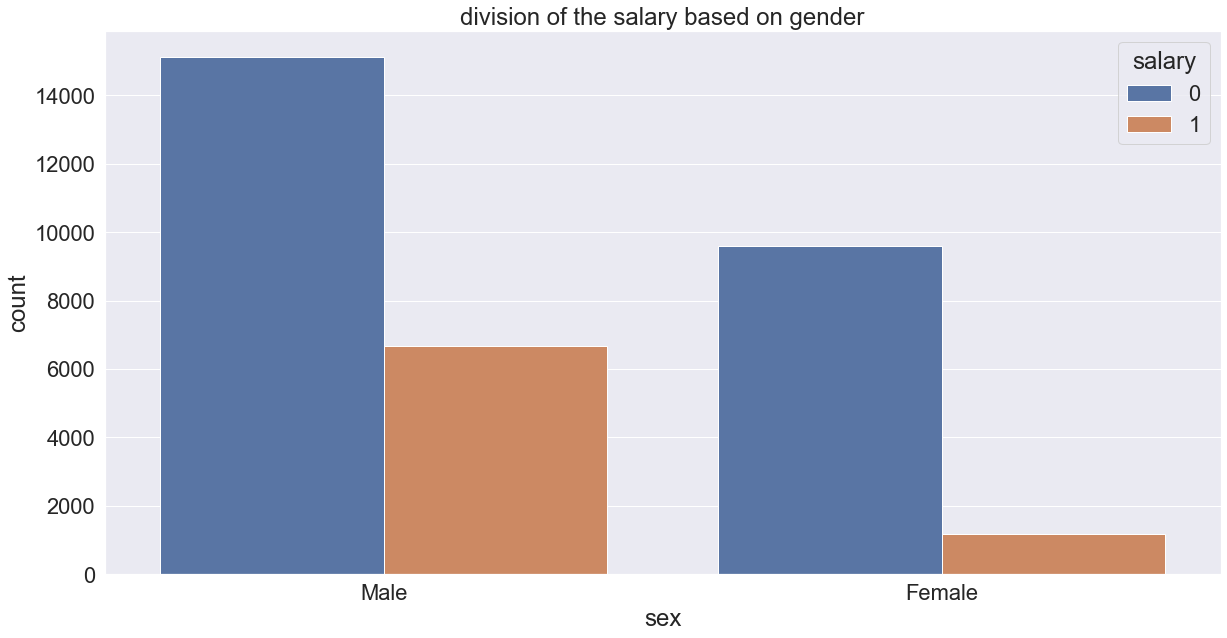

In [14]:
sns.countplot(x='sex',hue='salary',data=df)
plt.title("division of the salary based on gender")

## The below chart shows the division of the salary based on education where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on education')

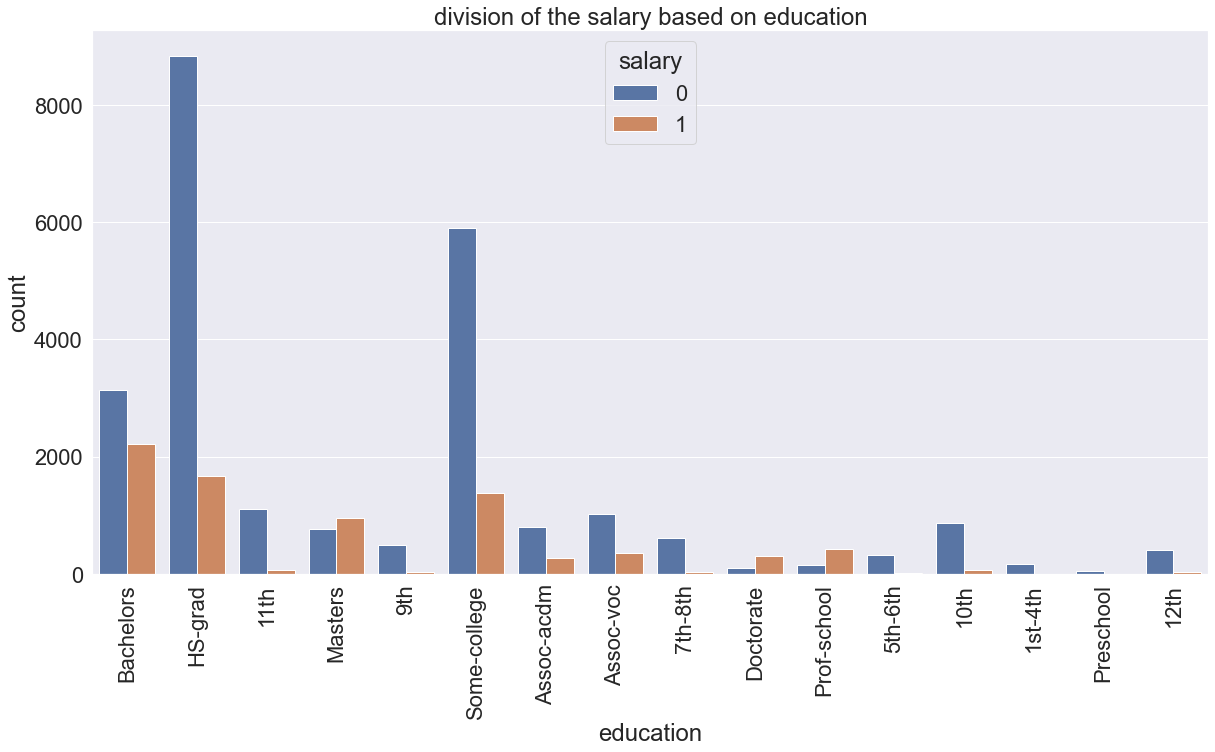

In [15]:
sns.countplot(x='education',hue='salary',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on education")

## The below chart shows the division of the salary based on workclass where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on workclass')

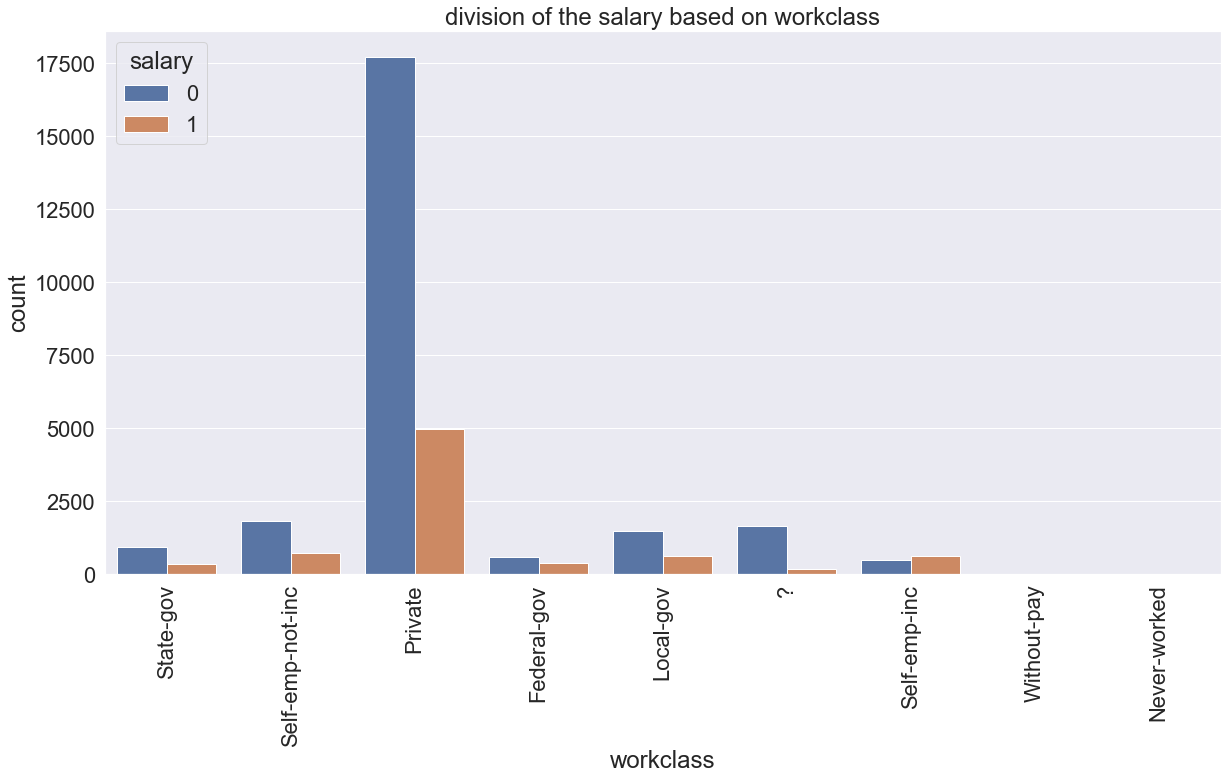

In [16]:
sns.countplot(x='workclass',hue='salary',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on workclass")

## The below chart shows the division of the salary based on age where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on age')

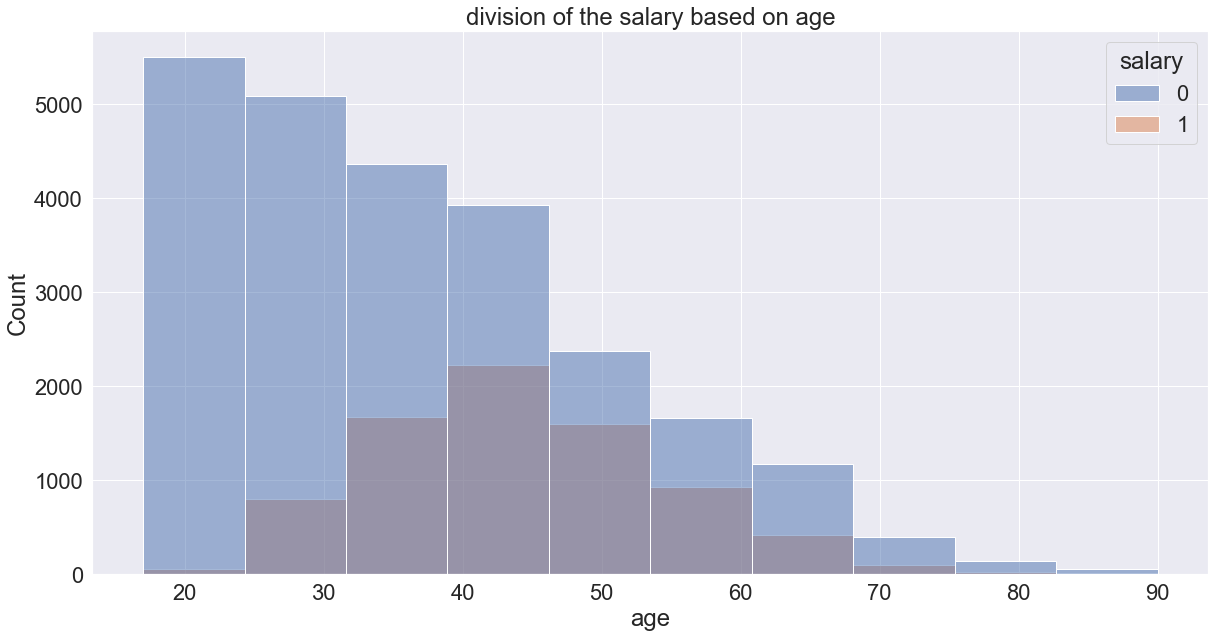

In [17]:
sns.histplot(x='age',hue='salary', bins=10,data=df)
plt.title("division of the salary based on age")

## The below chart shows the division of the salary based on race where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on race')

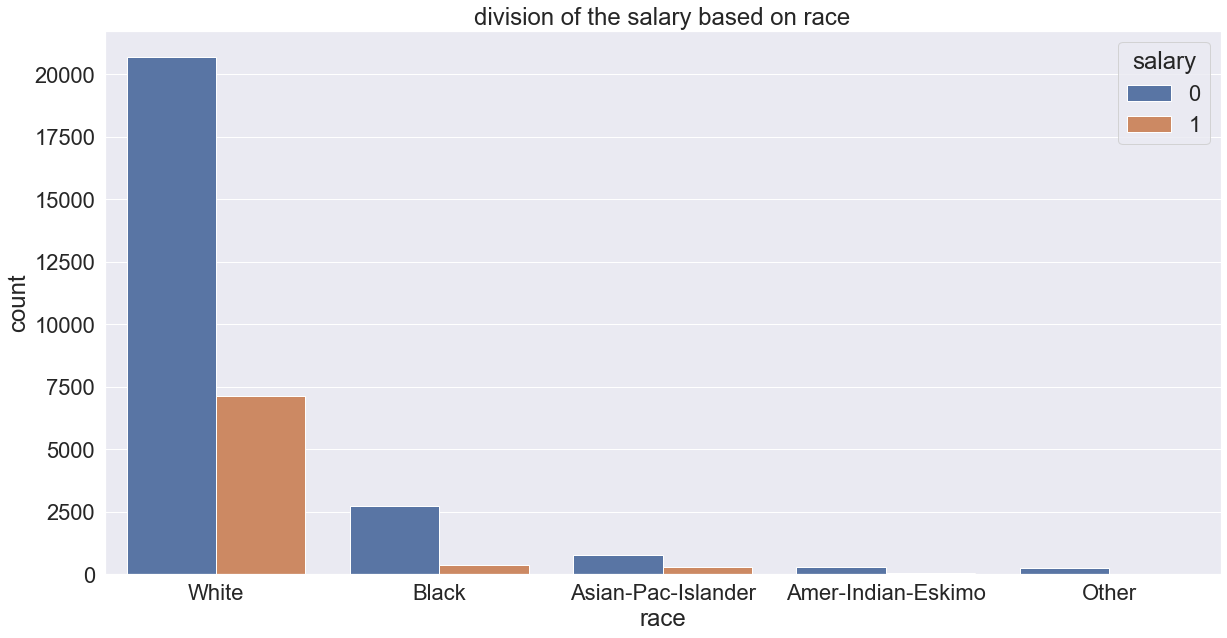

In [18]:
sns.countplot(x='race',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.title("division of the salary based on race")

## The below chart shows the division of the salary based on country where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on country')

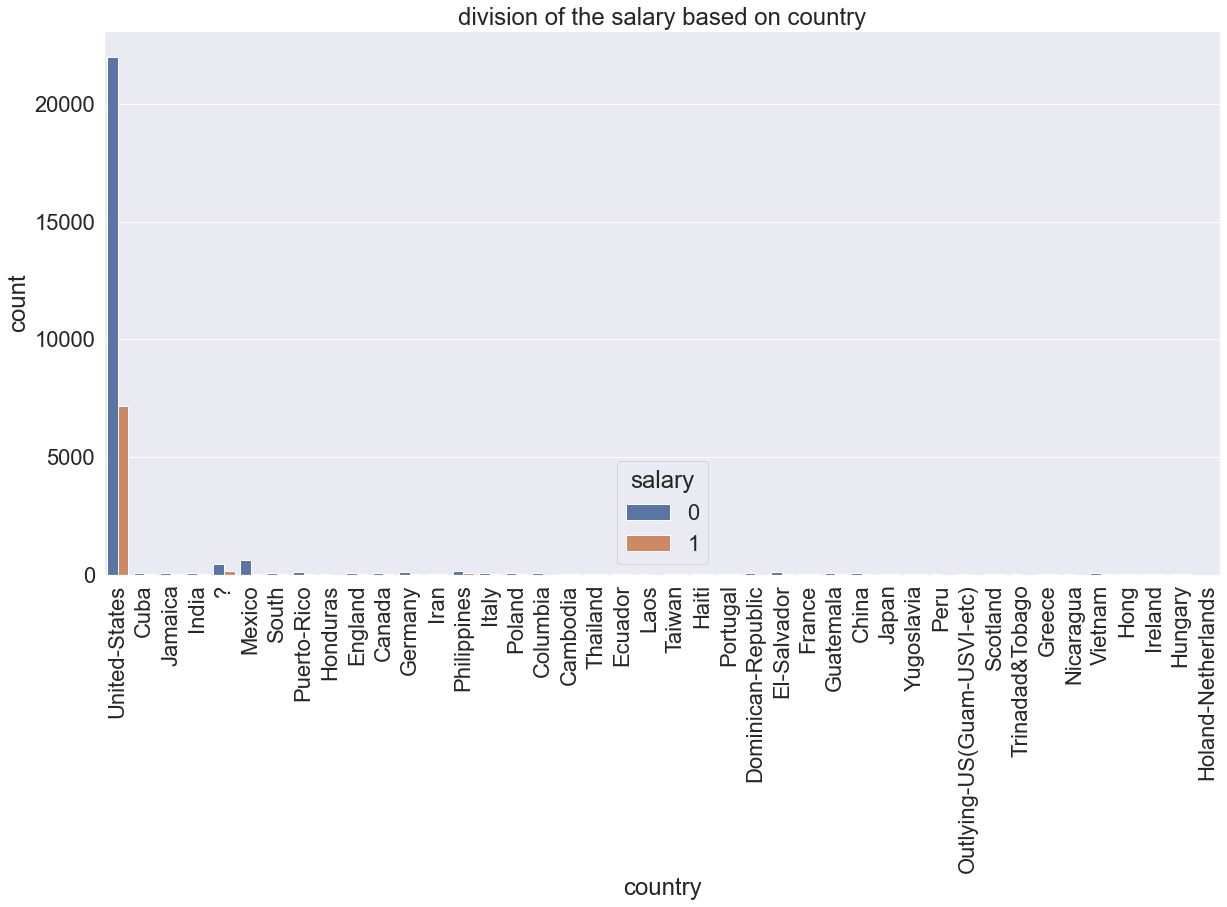

In [19]:
sns.countplot(x='country',hue='salary',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on country")

### The above chart shows most of the people are from US. So dividing the dataset into US and others which will contain all the other countries, might help 

## The below chart shows the division of the salary based on marital status where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on marital status')

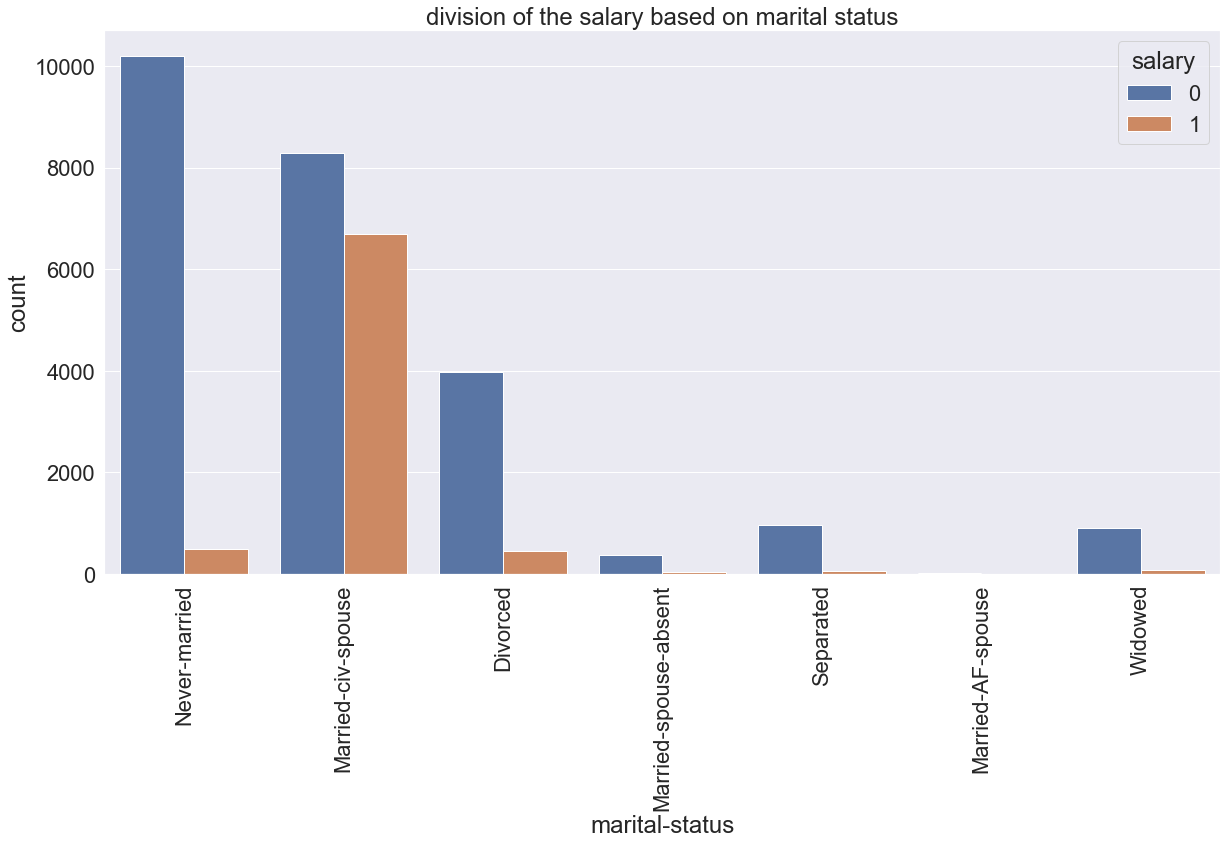

In [20]:
sns.countplot(x='marital-status',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("division of the salary based on marital status")

## The below chart shows the division of the salary based on occupation where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on occupation')

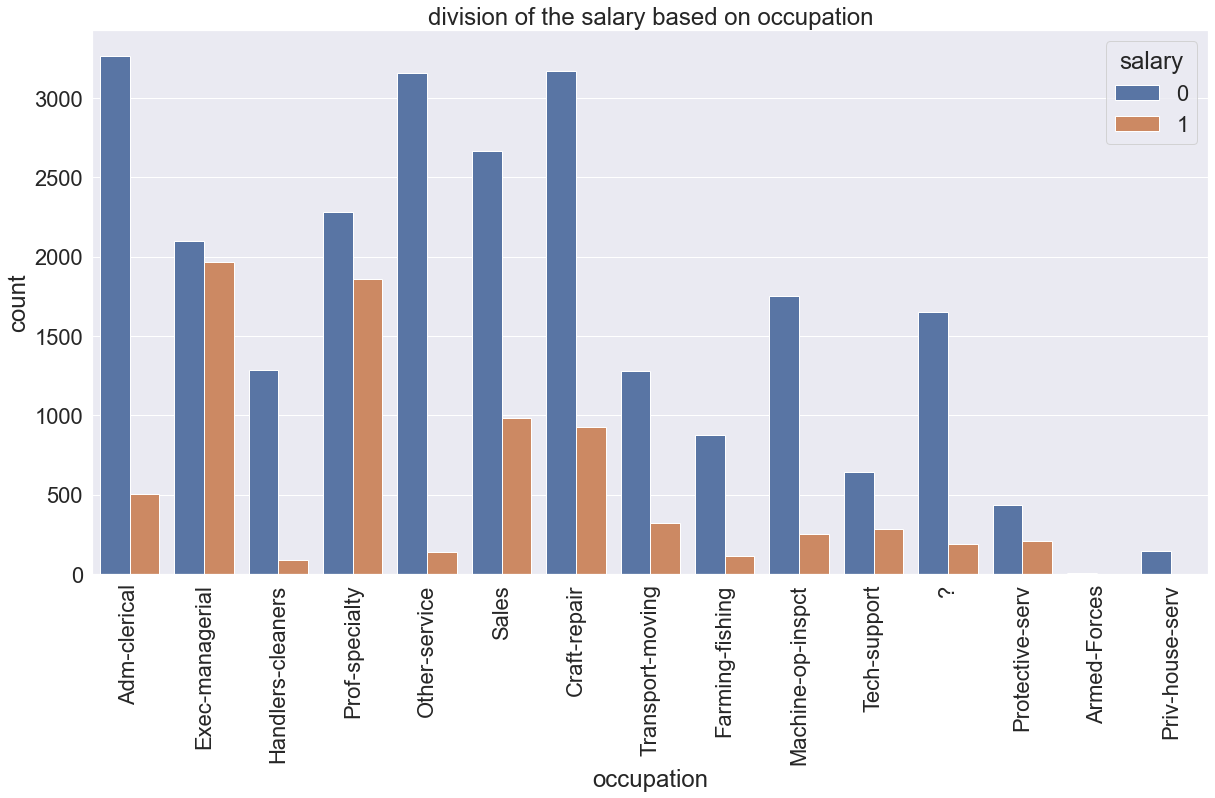

In [21]:
sns.countplot(x='occupation',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("division of the salary based on occupation")

### We see there are some '?' values in Workclass, occupation and country. So replacing them with nan values and maybe dropping them would help.

In [22]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

df.dropna(how='any',inplace=True)

In [23]:
df.shape

(30162, 15)

### We see the row count dropped from 32561 to 30162

In [24]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


### Dividing the dataset into US and Non-US countries as the majority of the dataset is from US. 

In [25]:
df.loc[df['country'] != 'United-States', 'country'] = 'Non-US'
df.loc[df['country'] == 'United-States', 'country'] = 'US'

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,US,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,US,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,US,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,US,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,US,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,US,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,US,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,US,0


## The below chart shows the division of the salary based on countries(US and Others) where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on countries(US and Others)')

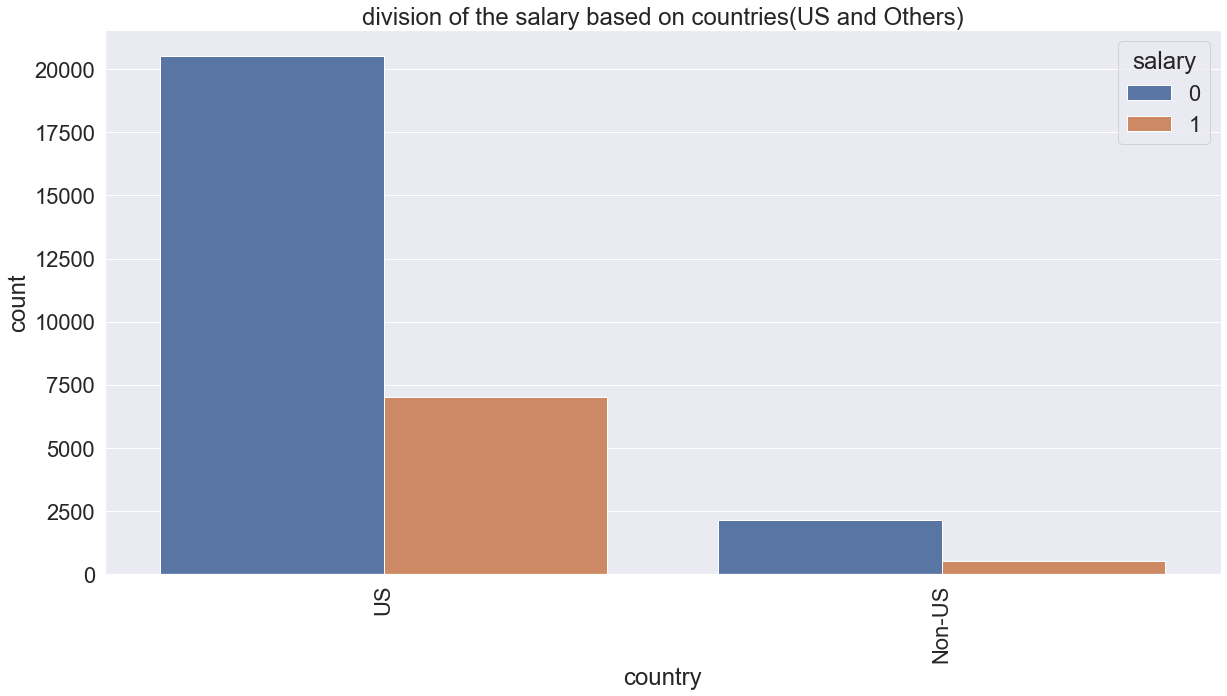

In [26]:
sns.countplot(x='country',hue='salary',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on countries(US and Others)")

## Mapping values 1 and 0 with US and Non-US countries

In [27]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,1,0


## The below chart shows the division of the salary based on hours-per-week where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on hours-per-week')

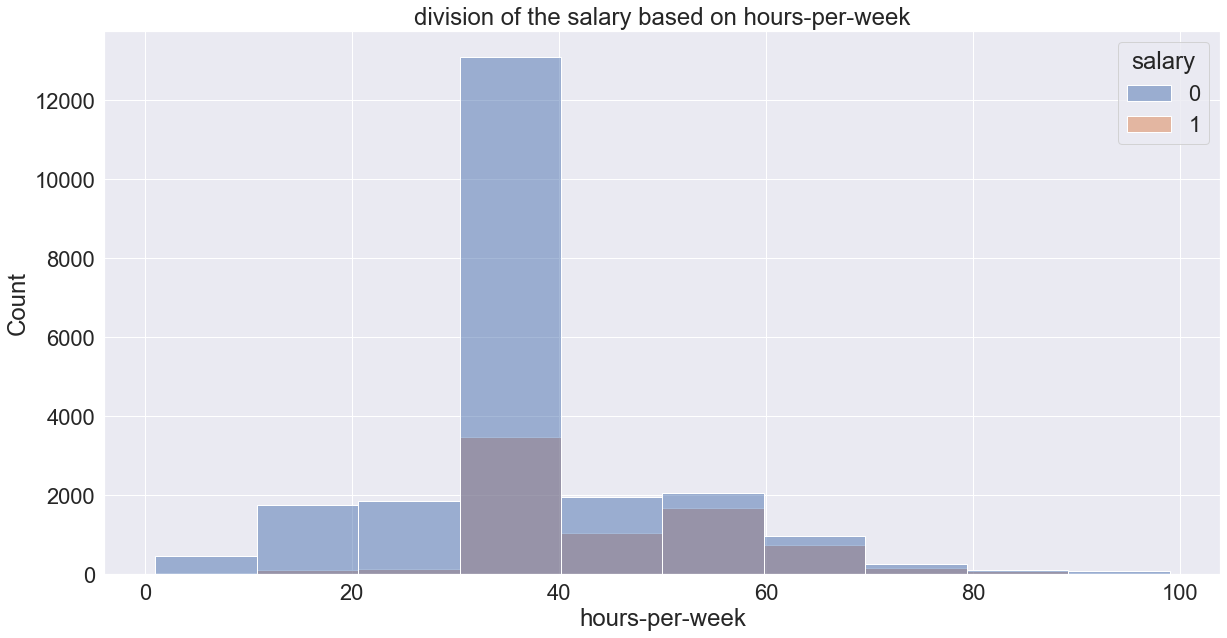

In [28]:
sns.histplot(x='hours-per-week',hue='salary', bins=10,data=df)
plt.title("division of the salary based on hours-per-week")

In [29]:
df['marital-status'] = df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Couple,Tech-support,Wife,White,Female,0,0,38,1,0
32557,40,Private,154374,HS-grad,9,Couple,Machine-op-inspct,Husband,White,Male,0,0,40,1,1
32558,58,Private,151910,HS-grad,9,Single,Adm-clerical,Unmarried,White,Female,0,0,40,1,0
32559,22,Private,201490,HS-grad,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,1,0


## Mapping values 1 and 0 with single and couple

In [30]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,Female,0,0,40,1,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,Male,0,0,45,1,1
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,Female,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,Male,5178,0,40,1,1


## Mapping values 0, 1, 2, 3, 4 and 5 with Unmarried, Wife, Husband, Not-in-family, own-child and other-relative respectively

In [31]:
relationship_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

df['relationship'] = df['relationship'].map(relationship_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,Male,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,Female,0,0,40,1,0
6,49,Private,160187,9th,5,1,Other-service,3,Black,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,Male,0,0,45,1,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,Female,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,Male,5178,0,40,1,1


### Mapping values 0, 1, 2, 3 and 4 with White, Amer-Indian-Eskimo, Asian-Pac-Islander, Black and Other respectively

In [32]:
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,Male,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,Female,0,0,40,1,0
6,49,Private,160187,9th,5,1,Other-service,3,3,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,Male,0,0,45,1,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,Female,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,Male,5178,0,40,1,1


## Mapping values 0 and 1 with Male and Female

In [33]:
df['sex'] = df['sex'].map({'Male':1,'Female':0}).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,0,Tech-support,1,0,0,0,0,38,1,0
32557,40,Private,154374,HS-grad,9,0,Machine-op-inspct,2,0,1,0,0,40,1,1
32558,58,Private,151910,HS-grad,9,1,Adm-clerical,0,0,0,0,0,40,1,0
32559,22,Private,201490,HS-grad,9,1,Adm-clerical,4,0,1,0,0,20,1,0


### Defining a Function called workcat which categorises the workclass in 4 main categories, namely, government, private, self-employed and no-pay classes

In [34]:
def workcat(x):
    if x['workclass'] == 'Federal-gov' or x['workclass'] == 'Local-gov' or x['workclass']==' State-gov': 
        return 'govt'
    elif x['workclass'] == 'Private':
        return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': 
        return 'self_employed'
    else: 
        return 'no_pay'
    
    
df['workclass_type']=df.apply(workcat, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0,no_pay
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1,private


## Mapping values 0, 1, 2 and 3 with govt, private, self-employed and no-pay respectively

In [35]:
workclass_map = {'govt':0,'private':1,'self_employed':2,'no_pay':3}

df['workclass_type'] = df['workclass_type'].map(workclass_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0,3
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1,1


## The below chart shows the division of the salary based on occupation where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'division of the salary based on occupation')

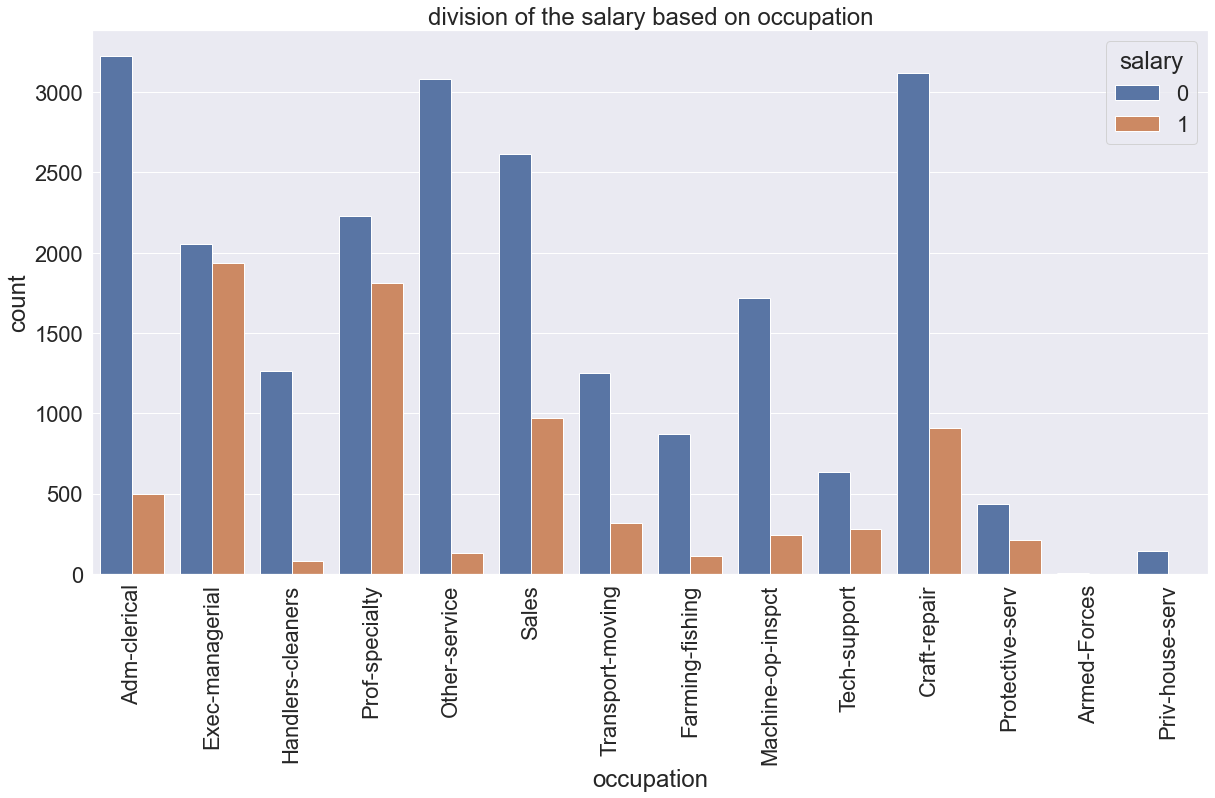

In [36]:
sns.countplot(x='occupation',hue='salary',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on occupation")

In [37]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

### Defining a Function called occupationcat which categorises the occupation in different categories

In [38]:
def occupationcat(x):
    if x['occupation'] == ' Adm-clerical': 
        return 1
    elif x['occupation'] == 'Exec-managerial':
        return 2
    elif x['occupation'] == 'Handlers-cleaners':
        return 3
    elif x['occupation'] == 'Prof-specialty':
        return 4
    elif x['occupation'] == 'Other-service':
        return 5
    elif x['occupation'] == 'Sales':
        return 6
    elif x['occupation'] == 'Craft-repair':
        return 7
    elif x['occupation'] == 'Transport-moving':
        return 8
    elif x['occupation'] == 'Farming-fishing':
        return 9
    elif x['occupation'] == 'Machine-op-inspct':
        return 10
    elif x['occupation'] == 'Tech-support':
        return 11
    elif x['occupation'] == 'Protective-serv':
        return 12
    elif x['occupation'] == 'Armed-Forces':
        return 13       
    else: 
        return 14
    
df['occupation_type']=df.apply(occupationcat, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type,occupation_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0,3,14
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0,2,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0,1,3
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0,1,3
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,1,4
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0,1,2
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,1,5
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1,2,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1,1,4
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1,1,2


### Dropping the columns namely, workclass, education, and occupation

In [39]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type,occupation_type
0,39,77516,13,1,3,0,1,2174,0,40,1,0,3,14
1,50,83311,13,0,2,0,1,0,0,13,1,0,2,2
2,38,215646,9,1,3,0,1,0,0,40,1,0,1,3
3,53,234721,7,0,2,3,1,0,0,40,1,0,1,3
4,28,338409,13,0,1,3,0,0,0,40,0,0,1,4
5,37,284582,14,0,1,0,0,0,0,40,1,0,1,2
6,49,160187,5,1,3,3,0,0,0,16,0,0,1,5
7,52,209642,9,0,2,0,1,0,0,45,1,1,2,2
8,31,45781,14,1,3,0,0,14084,0,50,1,1,1,4
9,42,159449,13,0,2,0,1,5178,0,40,1,1,1,2


### listing out all the unique values of the column capital-gain, just to check if can be dropped or not

In [40]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [41]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  84661, 257302, 201490], dtype=int64)

In [42]:
item_counts = df["fnlwgt"].value_counts()
item_counts

203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: fnlwgt, Length: 20263, dtype: int64

# Model Training and fitting

### Importing the train-test-split from sklearn and applying it on the dataset

In [43]:
from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

### printing the shape of the Train, Test and Validation dataset 

In [44]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (16890, 13)(16890,)
Validation dataset: (4223, 13)(4223,)
Test dataset: (9049, 13)(9049,)


### Importing various Classification models

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Making an empty list of the variable model and appending each model in the list

In [46]:
models = []
models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((KNeighborsClassifier()))

### iterating through the list model and printing it to see the names of the models to be deployed

In [47]:
for i in models:
    print ('-'*25)
    print (i)
print ('-'*25)

-------------------------
LogisticRegression()
-------------------------
RandomForestClassifier()
-------------------------
MLPClassifier()
-------------------------
GaussianNB()
-------------------------
DecisionTreeClassifier()
-------------------------
SVC()
-------------------------
KNeighborsClassifier()
-------------------------


### Importing accuracy score and model selection for applying kfold technique

In [48]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

### applying kfold technique with n_splits to be 2 and itereting all the model to check for the accuracy and list them

In [49]:
kfold = model_selection.KFold(n_splits=2)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i], X_train, y_train, cv=kfold, scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*50)
    print ('{0}: {1}'.format(models[i],acc_score))
print ('-'*50)

--------------------------------------------------
LogisticRegression(): 0.7873549609282501
--------------------------------------------------
RandomForestClassifier(): 0.8512905517404689
--------------------------------------------------
MLPClassifier(): 0.7814349988160075
--------------------------------------------------
GaussianNB(): 0.7868813639592707
--------------------------------------------------
DecisionTreeClassifier(): 0.8044044518115084
--------------------------------------------------
SVC(): 0.7847501775988633
--------------------------------------------------
KNeighborsClassifier(): 0.7658062988396874
--------------------------------------------------


### From the above results we can conclude that the Random Forest Classifier gives the best results and Hence using it and making a pickle file of the same by saving it and retrieving it whenever necessary to use to the model by the below code

In [51]:
import pickle
rf_random = RandomForestClassifier()
with open('Model.pkl', 'wb') as f:
    pickle.dump(rf_random, f)

## pickle.dump(rf_random, open('Model.pkl', 'wb'))

In [ ]:
# with open('Model.pkl', 'rb') as f:
#     loaded_clf = pickle.load(f)